# `nres` - simple yet powerful package for fitting neutron resonances
Tsviki Y. Hirsh

Sep 23rd 2024


In [1]:
%matplotlib inline

# install
To install simply clone the nres repo then install using pip

```bash
git clone http://github.com/tsvikihirsh/nres
cd nres
pip install .
```

This will install the nres package and you should be able to import `nres`

In [2]:
import nres

# TLDR - quick fit

In [3]:
# define material
Si = nres.CrossSection.from_material("Si")
# Si._set_energy_range(emin=0.3e6,emax=1.7e6)

# load data
data = nres.Data.from_transmission("silicon.dat") 

# define model
model = nres.TransmissionModel(Si) 

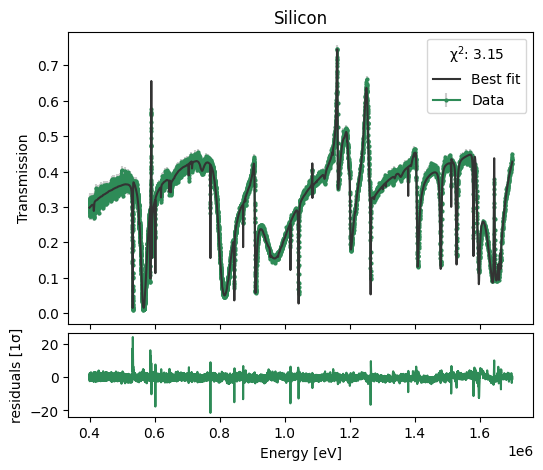

In [4]:
# fit using lmfit
result = model.fit(data,emin=0.4e6,emax=1.7e6) 

# plot fit results
result.plot();

In [5]:
result

# Define sample materials
The first step is to define the materials and elements included in your sample and load the corresponding cross section. `nres` has a simple interface to define complex combinations of isotopic materials.

`nres` has a builtin standard materials library based on PNNL materials compendum, that is available as a dict under `nres.materials`. Alternativaly `nres` has a builtin elements library that contains all the natural abundance elements, that is avialable as a dict under `nres.elements`.

cross section data is taken from ENDF8.0, using the precomplied [trinidi-data](https://github.com/lanl/trinidi-data) database

There is also an option to define material manually, however for this demonstration we will show how to use the materials and elements database for materials definition.

Here is one example of the `nres.materials` dict entry for Concrete, portland type.

To get a list of available materials, just write 
```python
nres.materials["
``` 
and hit the tab button. 

Alternativally, type `nres.materials.keys()` to get the full list.

In [3]:
nres.materials["Concrete, Portland"]

{'name': 'Concrete, Portland',
 'density': 2.3,
 'n': 0.081429,
 'formula': 'None',
 'elements': {'H': {'weight': 0.01,
   'isotopes': {'H-1': 0.009997, 'H-2': 2e-06}},
  'C': {'weight': 0.001, 'isotopes': {'C-12': 0.000988, 'C-13': 1.2e-05}},
  'O': {'weight': 0.529107,
   'isotopes': {'O-16': 0.527673, 'O-17': 0.000214, 'O-18': 0.00122}},
  'Na': {'weight': 0.016, 'isotopes': {'Na-23': 0.016}},
  'Mg': {'weight': 0.002,
   'isotopes': {'Mg-24': 0.001559, 'Mg-25': 0.000206, 'Mg-26': 0.000235}},
  'Al': {'weight': 0.033872, 'isotopes': {'Al-27': 0.033872}},
  'Si': {'weight': 0.337021,
   'isotopes': {'Si-28': 0.309615, 'Si-29': 0.016291, 'Si-30': 0.011122}},
  'K': {'weight': 0.013,
   'isotopes': {'K-39': 0.012082, 'K-40': 2e-06, 'K-41': 0.000917}},
  'Ca': {'weight': 0.044,
   'isotopes': {'Ca-40': 0.042531,
    'Ca-42': 0.000298,
    'Ca-43': 6.4e-05,
    'Ca-44': 0.001007,
    'Ca-46': 2e-06,
    'Ca-48': 9.8e-05}},
  'Fe': {'weight': 0.014,
   'isotopes': {'Fe-54': 0.00079,
    '

In a similar way, the `nres.elements` contains a database of all known elements and their isotopic properties.

To get a list of available elements, just write 
```python
nres.elements["
``` 
and hit the tab button. 

In [4]:
nres.elements["Tungsten"]

{'name': 'Tungsten',
 'n': 0.06322199557658834,
 'formula': 'W',
 'density': 19.3,
 'elements': {'W': {'weight': 1,
   'isotopes': {'W-180': 0.0012,
    'W-182': 0.265,
    'W-183': 0.1431,
    'W-184': 0.3064,
    'W-186': 0.2843}}}}

To load the cross section of any material use the `nres.CrossSection.from_material` method

In [5]:
concrete = nres.CrossSection.from_material(nres.materials["Concrete, Portland"])

# or simply

concrete = nres.CrossSection.from_material("Concrete, Portland")

The cross section table is accessible through the `.table` method and can be directly plotted through the `.plot()` call

in 'nres` the energy units are always in $eV$, and the cross section are always givn in units of barns (10$^{-24}$ cm$^2$)


In [6]:
concrete.table

,H,C,O,Na,Mg,Al,Si,K,Ca,Fe,total
energy,,,,,,,,,,,
1.000000e-05,1177.053682,78.607435,54.171552,66.896570,44.090306,27.437430,29.896403,124.170082,46.181520,216.154651,59.347657
1.031250e-05,1159.086420,77.411027,53.347923,65.878860,43.421096,27.020210,29.442377,122.277251,45.480265,212.873605,58.444833
1.034854e-05,1150.502398,76.839438,52.954443,65.392650,43.101390,26.820880,29.225468,121.372922,45.145232,211.306138,58.013512
1.062500e-05,1141.918376,76.267850,52.560963,64.906440,42.781684,26.621550,29.008559,120.468593,44.810200,209.738670,57.582192
1.069707e-05,1133.705059,75.720964,52.184488,64.441245,42.475811,26.430845,28.801032,119.603330,44.489659,208.239000,57.169513
...,...,...,...,...,...,...,...,...,...,...,...
1.920000e+08,0.481787,0.349557,0.446126,1.855218,1.810334,0.683000,0.729964,1.999435,0.834698,1.266018,0.624111
1.940000e+08,0.481787,0.349557,0.446126,1.855218,1.810334,0.683000,0.729964,1.999435,0.830539,1.266018,0.623928
1.960000e+08,0.481787,0.349557,0.446126,1.855218,1.810334,0.683000,0.729964,1.999435,0.826621,1.266018,0.623756


In the plot method the elemental components are plotted with their associated weight fractions, also labeled as percentages in the label. The total cross section is the average-weighted total cross section of that material.

The component weights can also be accessed through the `.weights` method. Notice that in this way the weights are given as weight fractions

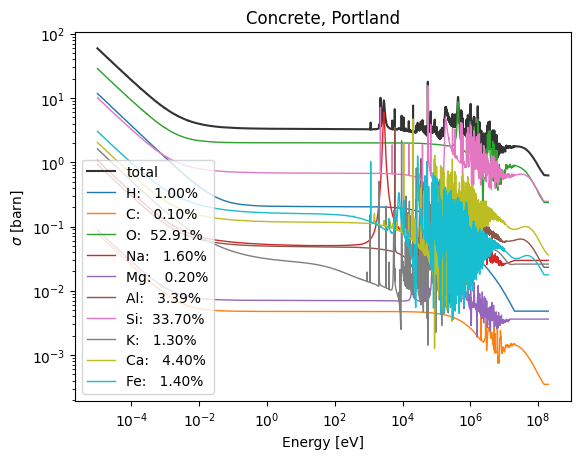

In [8]:
concrete.plot(loglog=True)

In [9]:
concrete.weights

H     0.010000
C     0.001000
O     0.529107
Na    0.016000
Mg    0.002000
Al    0.033872
Si    0.337021
K     0.013000
Ca    0.044000
Fe    0.014000
dtype: float64

In a similar way, differnet elements can be defined

In [11]:
w = nres.CrossSection.from_material("Tungsten")

# or

w = nres.CrossSection.from_material("W")

In [12]:
w.table

,W,total
energy,,
1.000000e-05,933.968213,933.968213
1.031250e-05,919.724919,919.724919
1.062500e-05,906.115095,906.115095
1.093750e-05,893.092631,893.092631
1.125000e-05,880.617279,880.617279
...,...,...
1.432280e+08,3.331780,3.331780
1.441680e+08,3.270202,3.270202
1.489570e+08,3.206472,3.206472


In case we are interested to keep the isotopic composition, e.g. to include isotopic composition at the fitting model, we can pass `isotopic=True` as a flag. This can be done for any material as well.

In [14]:
w = nres.CrossSection.from_material("W",isotopic=True)
w.table

,W-180,W-182,W-183,W-184,W-186,total
energy,,,,,,
1.000000e-05,1544.057920,1054.511860,519.733830,113.792220,1901.076510,933.968213
1.031250e-05,1520.513560,1038.438410,511.815790,112.077230,1872.051350,919.724919
1.062500e-05,1498.015730,1023.080170,504.249980,110.438800,1844.316430,906.115095
1.093750e-05,1476.489390,1008.385010,497.011020,108.871400,1817.777720,893.092631
1.125000e-05,1455.866670,994.306800,490.076060,107.370070,1792.354210,880.617279
...,...,...,...,...,...,...
1.432280e+08,3.224744,3.388708,3.238949,3.340497,3.316973,3.331780
1.441680e+08,3.183210,3.323411,3.184426,3.279060,3.255063,3.270202
1.489570e+08,3.141677,3.255499,3.129904,3.215163,3.190673,3.206472


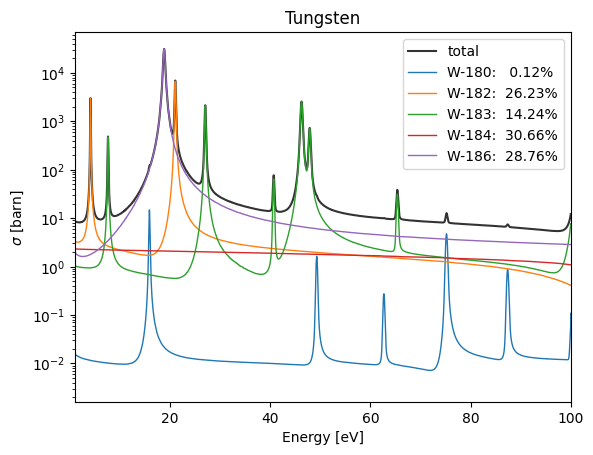

In [18]:
w.plot(xlim=(1,100),logy=True)

# combining samples
combining different samples is super easy with `nres`, just add the CrossSection objects together with the `total_weight` (that is the relative weight) of each component can be added directly in the material definition or as a multiplication operation.

In [23]:
gold = nres.CrossSection.from_material("gold",total_weight=0.1)
zns = nres.CrossSection.from_material(nres.materials["ZnS(Ag):LiF 95wt% 6Li PHOSPHOR POWDER Neutron Detectors"],
                                      short_name="ZnS",total_weight=0.9)

In [24]:
golden_zns = gold + zns

# or

golden_zns = gold*0.2 + zns*0.8

In [26]:
golden_zns.table

,Au,F,Li,S,Zn,total
energy,,,,,,
1.000000e-05,4952.517090,1.248966,370.390394,11.526591,54.165412,1023.987132
1.024150e-05,4894.102869,1.234226,367.562815,11.438810,53.754436,1012.049927
1.031250e-05,4876.929330,1.227112,364.735236,11.351029,53.343459,1008.361016
1.048300e-05,4837.521160,1.219998,362.033332,11.267153,52.950788,1000.236493
1.062500e-05,4804.700280,1.210989,359.331428,11.183277,52.558117,993.429387
...,...,...,...,...,...,...
2.862088e+07,4.879309,0.046396,0.009736,0.589760,1.700812,2.008553
2.900000e+07,4.855500,0.046396,0.009736,0.589760,1.700812,2.003792
2.949576e+07,4.831009,0.046396,0.009736,0.589760,1.700812,1.998894
